In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
PATH = "electromigration_5/GBN_229_"
files = [PATH + '0{}.dat'.format(i) for i in range(22, 30)]

     Bias calc(V)   Current (A)  LI X (V)    LI (V)
0        0.500000  2.020010e-11  0.197152  0.117041
1        0.496078  2.001970e-11  0.195994  0.114497
2        0.492157  1.970900e-11  0.195663  0.115313
3        0.488235  1.924950e-11  0.196432  0.111723
4        0.484314  1.895680e-11  0.195106  0.113097
..            ...           ...       ...       ...
251     -0.484314 -4.936880e-11  0.194819  0.213080
252     -0.488235 -5.180690e-11  0.195699  0.212057
253     -0.492157 -5.120110e-11  0.194979  0.217325
254     -0.496078 -5.299410e-11  0.193183  0.216598
255     -0.500000 -5.283650e-11  0.195760  0.218684

[256 rows x 4 columns]


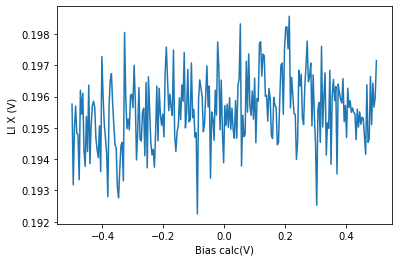

In [22]:
data_file = files[0]
with open(data_file,'r') as f:
    for i in range(71):
        next(f) # skip first row
    df = pd.DataFrame(l.rstrip().split() for l in f)
    df = df.astype('float64')
df.columns = ['Bias calc(V)', 'Current (A)', 'LI X (V)', 'LI (V)']
print(df)
sns.lineplot('Bias calc(V)', 'LI X (V)', data=df)

electromigration_5/GBN_229_022.dat
electromigration_5/GBN_229_023.dat
electromigration_5/GBN_229_024.dat
electromigration_5/GBN_229_025.dat
electromigration_5/GBN_229_026.dat
electromigration_5/GBN_229_027.dat
electromigration_5/GBN_229_028.dat
electromigration_5/GBN_229_029.dat


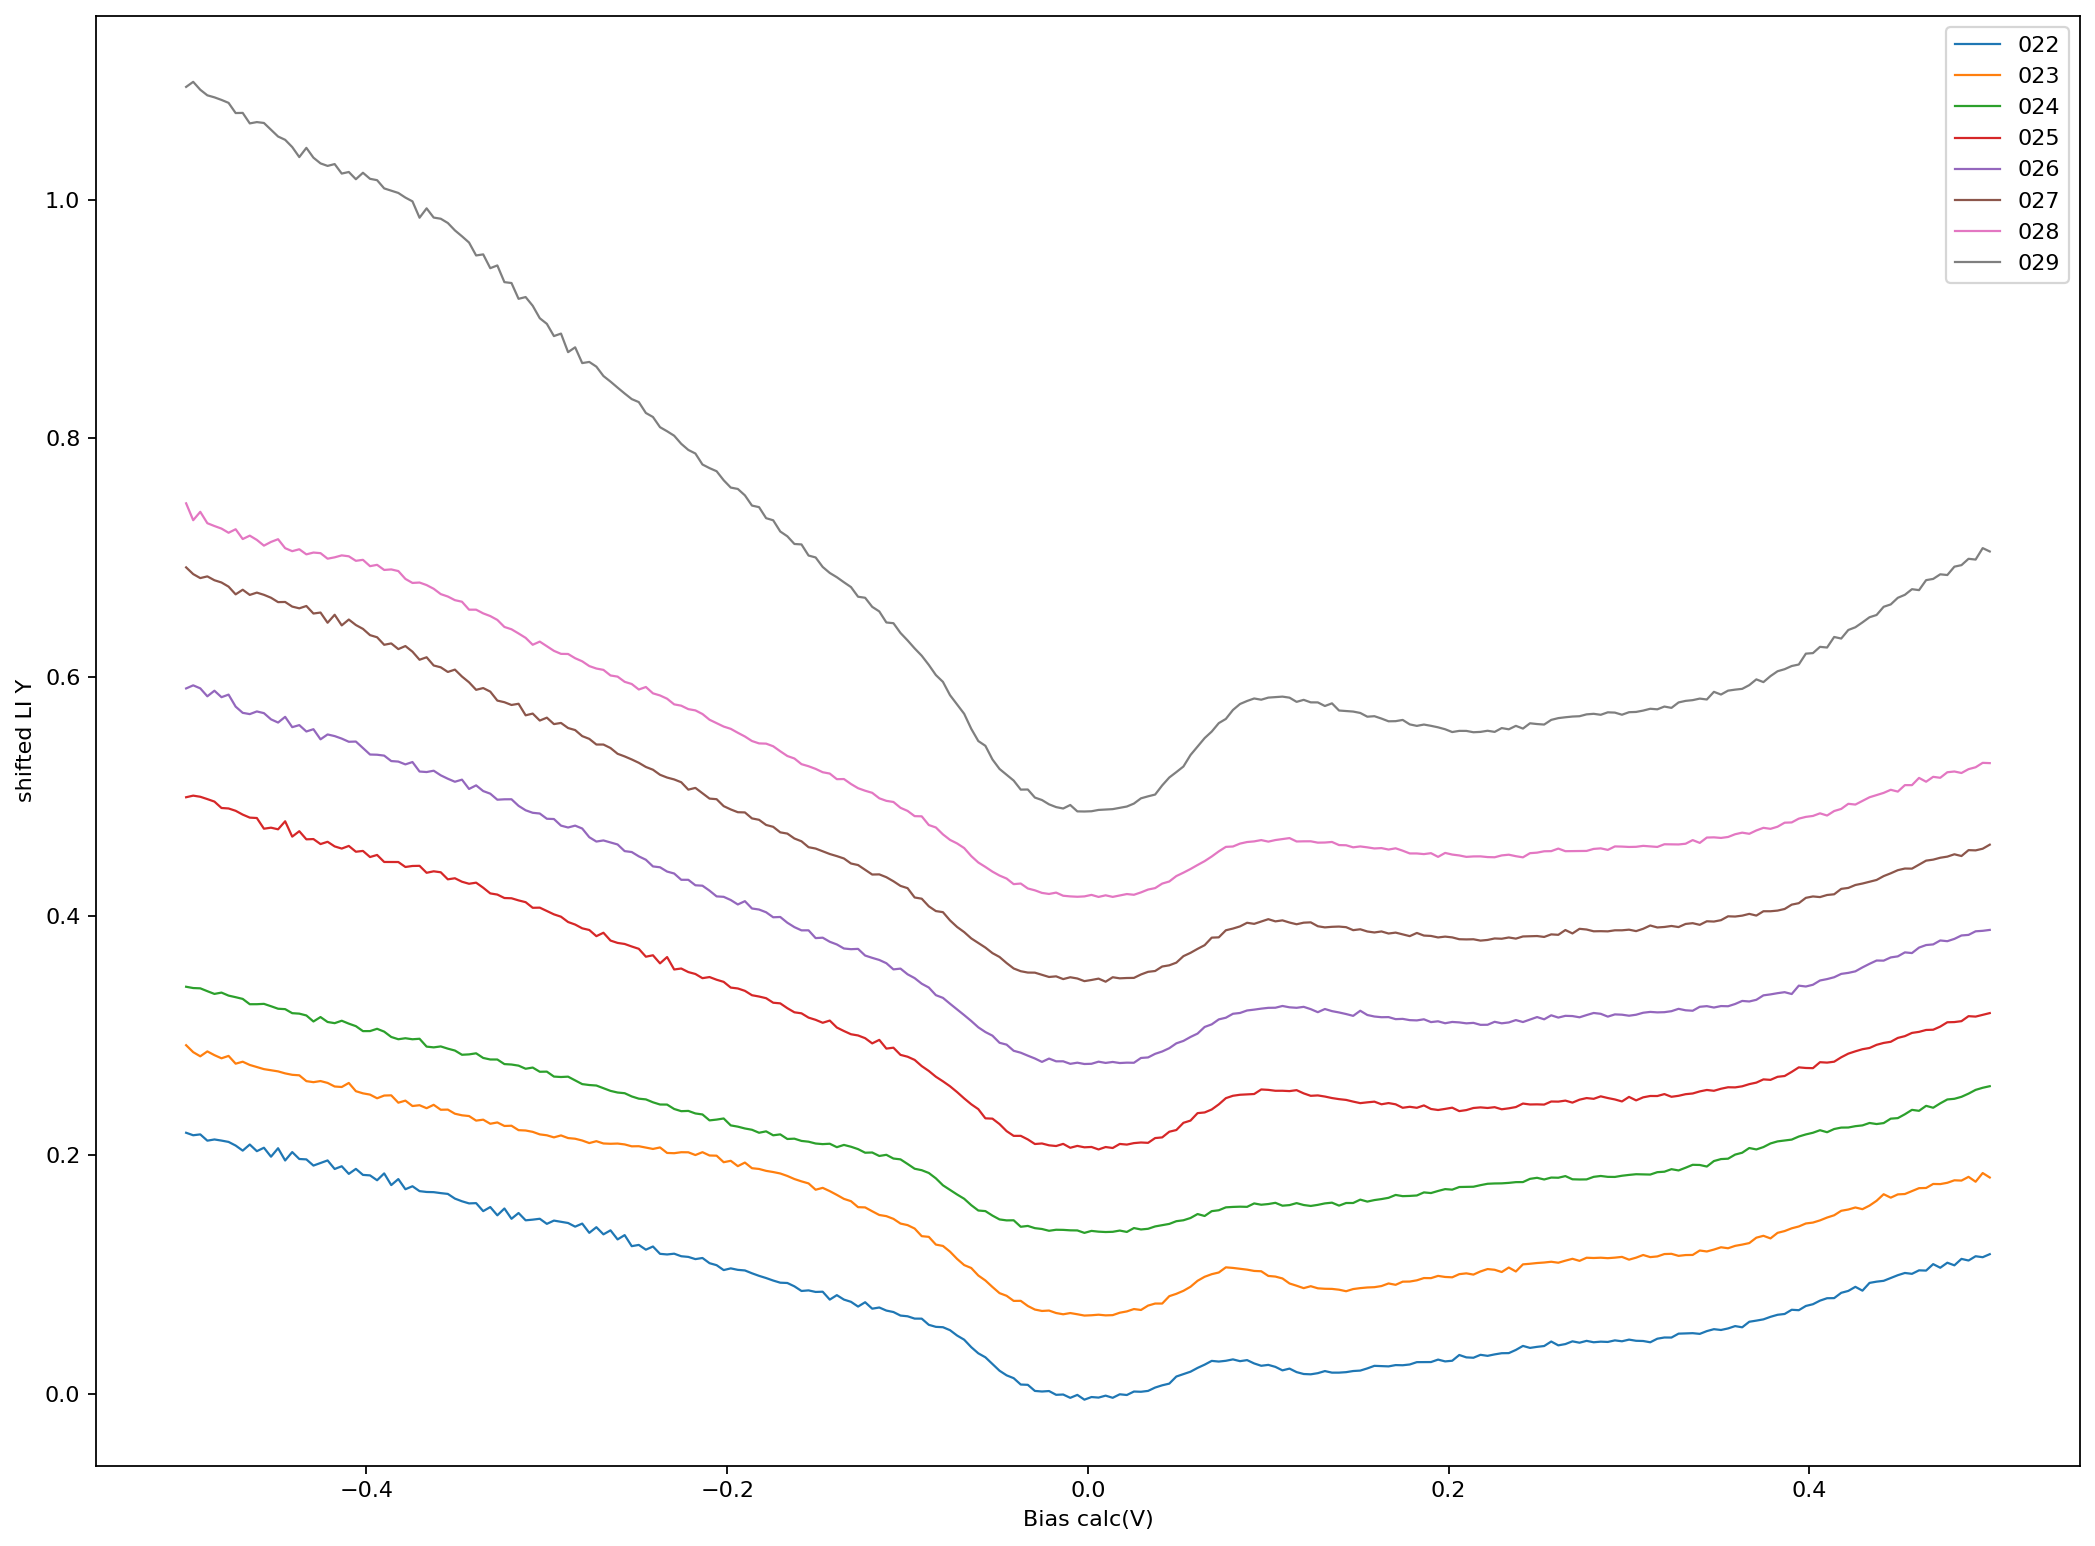

In [26]:
plt.figure(num=None, figsize=(16, 12), dpi=160)
OFFSET = 0.07
names = ["0{}".format(i) for i in range(22, 30)]
for j, file in enumerate(files):
    with open(file,'r') as f:
        for i in range(71):
            next(f) # skip first row
        df = pd.DataFrame(l.rstrip().split() for l in f)
        df = df.astype('float64')
        print(file)
        columns = ['Bias calc(V)', 'Current (A)', 'LI X (V)', 'LI (V)']
        df = df.rename(columns={
            0 : 'Bias calc(V)',
            1 : 'Current (A)',
            2 : 'LI X (V)',
            3 : 'LI Y (V)'
                       })
#         df['normed LI Y'] = df['LI Y (V)'] / df['LI Y (V)'].max()
        df['shifted LI Y'] = df['LI Y (V)'] + j * OFFSET
        sns.lineplot('Bias calc(V)', 'shifted LI Y', data=df, label=names[j], lw=1)

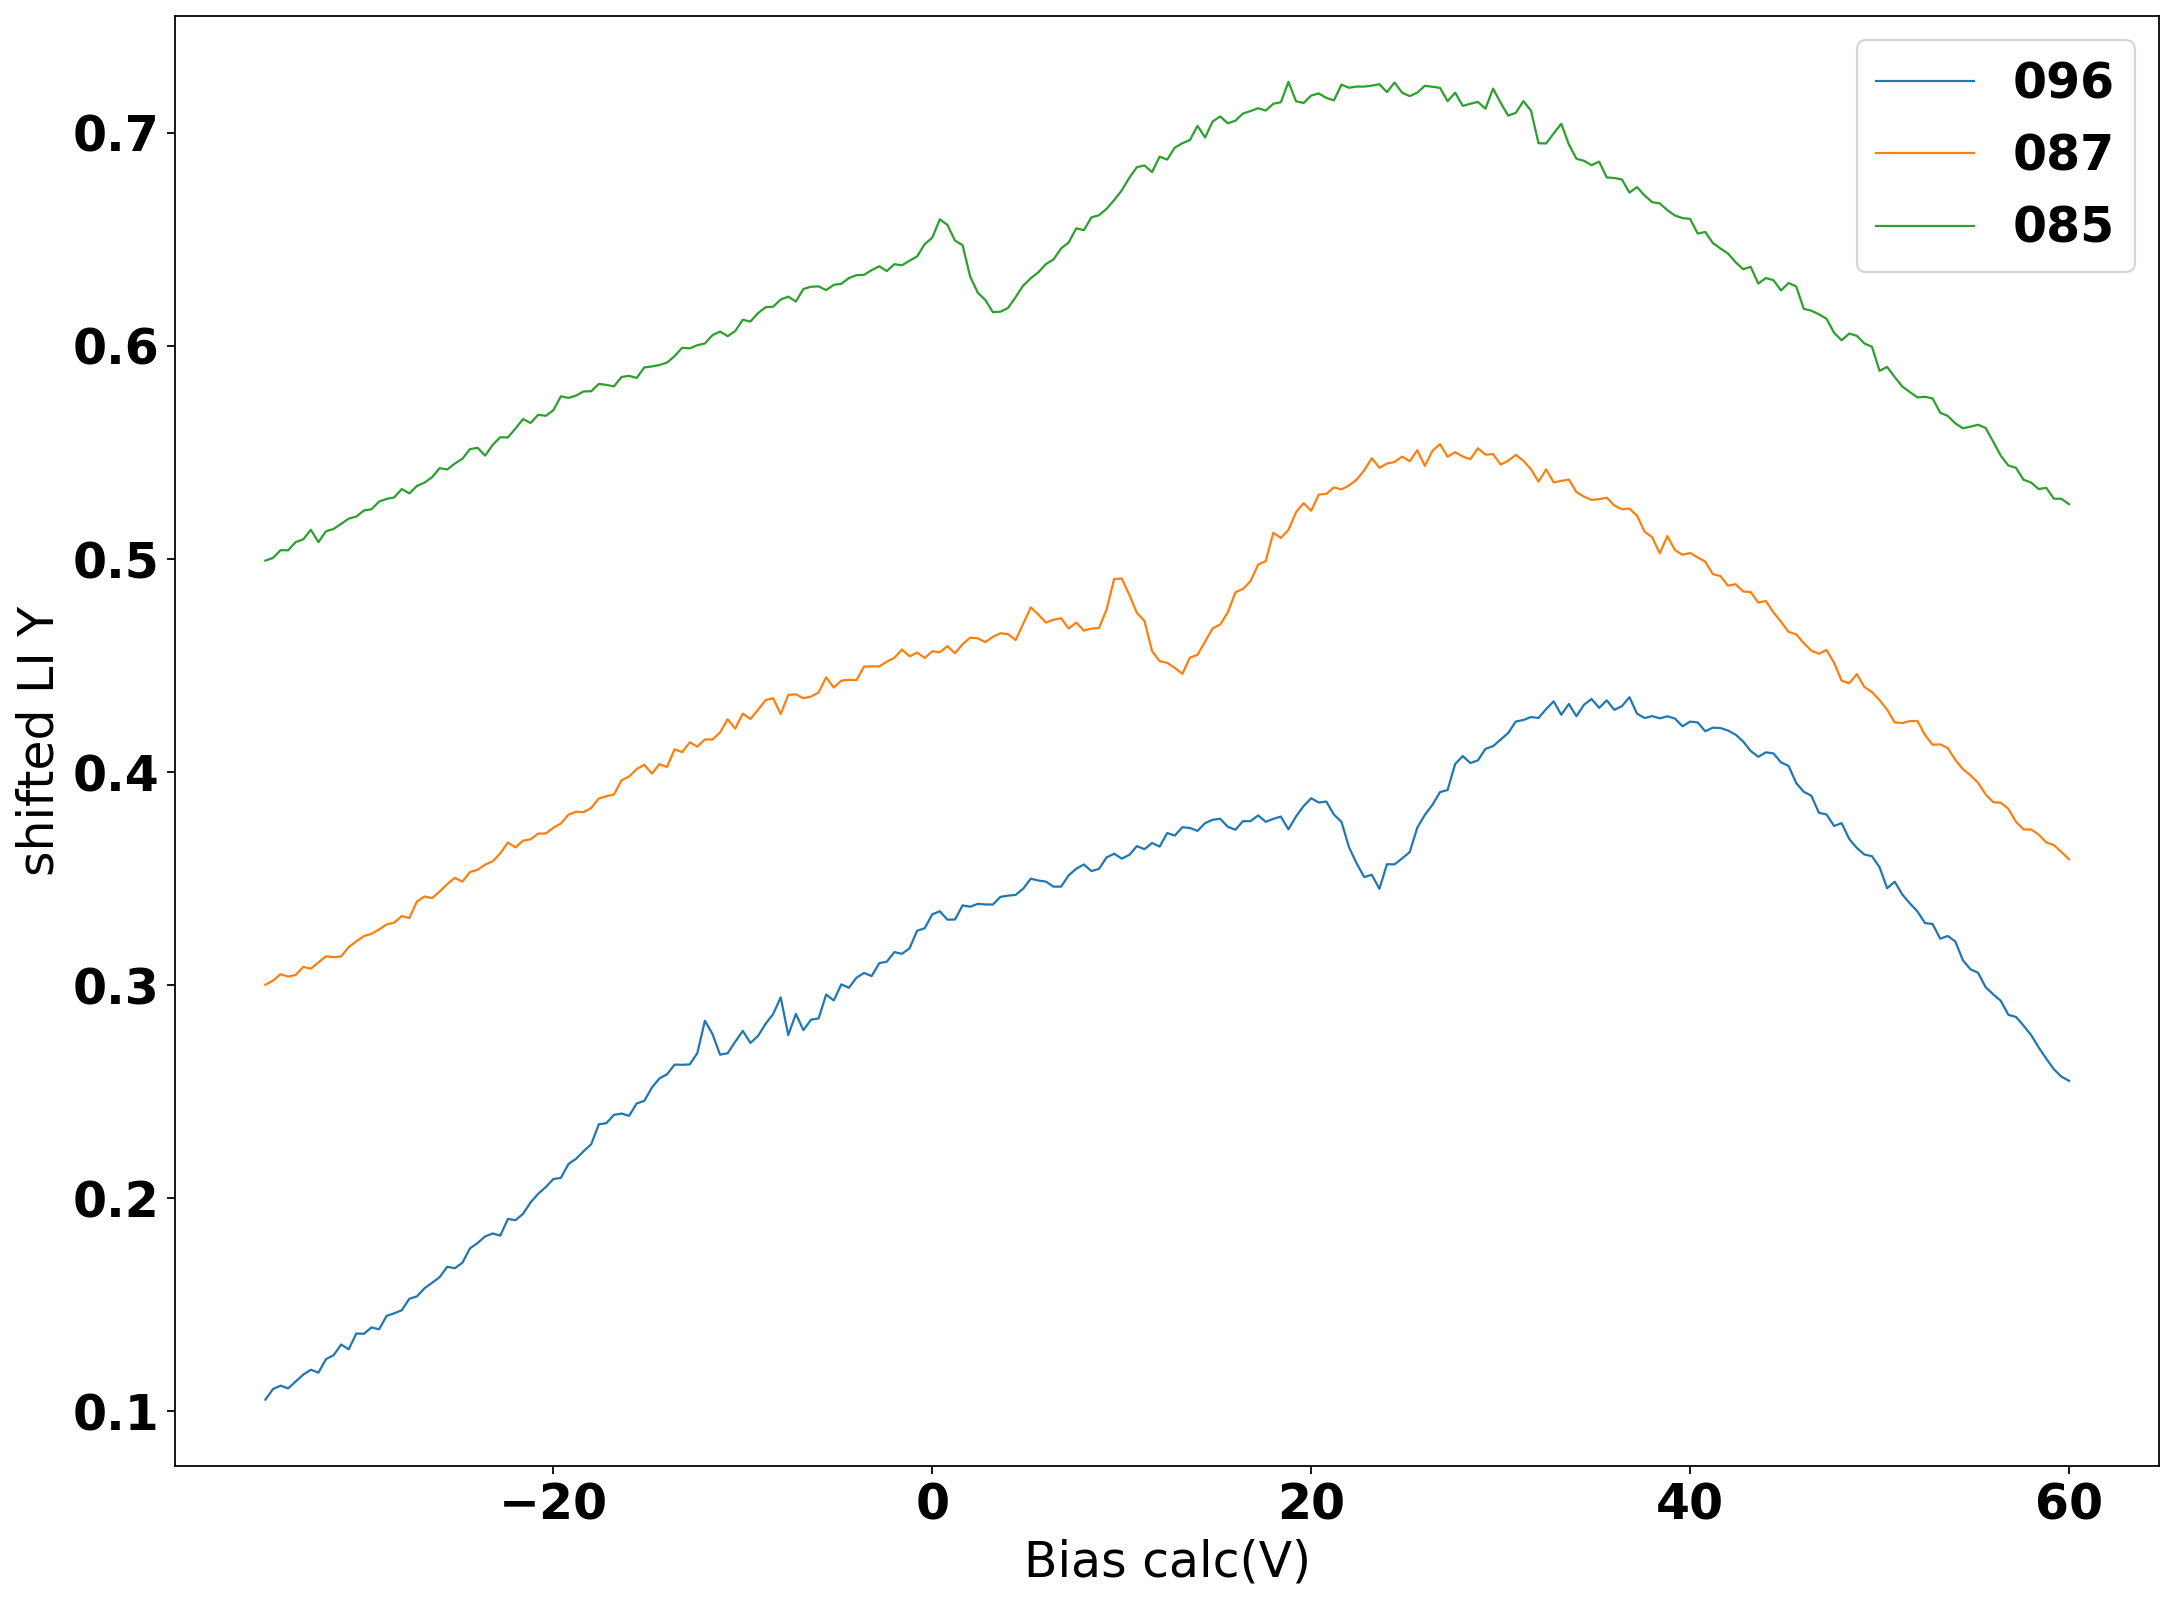

In [67]:
import matplotlib
matplotlib.rc('font', **font)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

plt.figure(num=None, figsize=(16, 12), dpi=160)

PATH = "electromigration_7/GBN_237_transport_"
names = ['077', '078', '081', '083', '085', '087', '096', 
         '098', '100', '102', '104', '106', '108', '110', '114', '116', '118']
names = ['096', '087', '085']
files = [PATH + '{}.dat'.format(i) for i in names]

OFFSET = 0.2

for j, file in enumerate(files):
    with open(file,'r') as f:
        for i in range(71):
            next(f) # skip first row
        df = pd.DataFrame(l.rstrip().split() for l in f)
        df = df.astype('float64')
        columns = ['Bias calc(V)', 'Current (A)', 'LI X (V)', 'LI (V)']
        df = df.rename(columns={
            0 : 'Bias calc(V)',
            1 : 'Current (A)',
            2 : 'LI X (V)',
            3 : 'LI Y (V)'
                       })
        df['shifted LI Y'] = df['LI Y (V)'] + j * OFFSET
        sns.lineplot('Bias calc(V)', 'shifted LI Y', data=df, label=names[j], lw=1)

